In [2]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [3]:
USE_CUDA = torch.cuda.is_available() # GPU를 사용가능하면 True, 아니라면 False를 리턴
device = torch.device("cuda" if USE_CUDA else "cpu") # GPU 사용 가능하면 사용하고 아니면 CPU 사용
print("다음 기기로 학습합니다:", device)

다음 기기로 학습합니다: cpu


In [4]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [5]:
# hyperparameters
training_epochs = 15
batch_size = 100

In [6]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

9920512it [05:04, 32129.73it/s]                                                                                        

Extracting MNIST_data/MNIST\raw\train-images-idx3-ubyte.gz to MNIST_data/MNIST\raw



0it [00:00, ?it/s]
  0%|                                                                                        | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\train-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw




0it [00:00, ?it/s]

  0%|                                                                                      | 0/1648877 [00:00<?, ?it/s]

  1%|▋                                                                      | 16384/1648877 [00:00<00:24, 66061.68it/s]

  1%|█                                                                      | 24576/1648877 [00:01<00:34, 47632.92it/s]

  2%|█▍                                                                     | 32768/1648877 [00:01<00:38, 41520.29it/s]

  2%|█▊                                                                     | 40960/1648877 [00:01<00:41, 38488.42it/s]

  3%|██                                                                     | 49152/1648877 [00:01<00:44, 35695.23it/s]

  3%|██▍                                                                    | 57344/1648877 [00:02<00:45, 34699.52it/s]

  4%|██▊                                                                    | 65536/1648877 [00:02<00:47, 33409.71it/s]

  4%|███▏ 

 32%|██████████████████████▌                                               | 532480/1648877 [00:16<00:34, 32104.31it/s]

 33%|██████████████████████▉                                               | 540672/1648877 [00:16<00:34, 32073.30it/s]

 33%|███████████████████████▎                                              | 548864/1648877 [00:17<00:34, 32081.45it/s]

 34%|███████████████████████▋                                              | 557056/1648877 [00:17<00:34, 31581.74it/s]

 34%|███████████████████████▉                                              | 565248/1648877 [00:17<00:33, 32154.84it/s]

 35%|████████████████████████▎                                             | 573440/1648877 [00:17<00:33, 32070.21it/s]

 35%|████████████████████████▋                                             | 581632/1648877 [00:18<00:33, 32049.76it/s]

 36%|█████████████████████████                                             | 589824/1648877 [00:18<00:33, 31986.57it/s]

 36%|█████████████████████████▍ 

 64%|████████████████████████████████████████████▏                        | 1056768/1648877 [00:32<00:18, 31796.71it/s]

 65%|████████████████████████████████████████████▌                        | 1064960/1648877 [00:33<00:18, 31968.93it/s]

 65%|████████████████████████████████████████████▉                        | 1073152/1648877 [00:33<00:17, 32023.68it/s]

 66%|█████████████████████████████████████████████▎                       | 1081344/1648877 [00:33<00:17, 32008.66it/s]

 66%|█████████████████████████████████████████████▌                       | 1089536/1648877 [00:34<00:17, 32049.04it/s]

 67%|█████████████████████████████████████████████▉                       | 1097728/1648877 [00:34<00:17, 32108.06it/s]

 67%|██████████████████████████████████████████████▎                      | 1105920/1648877 [00:34<00:16, 32004.44it/s]

 68%|██████████████████████████████████████████████▌                      | 1114112/1648877 [00:34<00:16, 31927.94it/s]

 68%|███████████████████████████

 96%|██████████████████████████████████████████████████████████████████▏  | 1581056/1648877 [00:48<00:01, 36251.33it/s]

 96%|██████████████████████████████████████████████████████████████████▌  | 1589248/1648877 [00:48<00:01, 36395.80it/s]

 97%|██████████████████████████████████████████████████████████████████▊  | 1597440/1648877 [00:49<00:01, 36206.25it/s]

 97%|███████████████████████████████████████████████████████████████████▏ | 1605632/1648877 [00:49<00:01, 35876.07it/s]

 98%|███████████████████████████████████████████████████████████████████▌ | 1613824/1648877 [00:49<00:00, 35292.95it/s]

 98%|███████████████████████████████████████████████████████████████████▉ | 1622016/1648877 [00:49<00:00, 34852.05it/s]

 99%|████████████████████████████████████████████████████████████████████▏| 1630208/1648877 [00:50<00:00, 34372.85it/s]

 99%|████████████████████████████████████████████████████████████████████▌| 1638400/1648877 [00:50<00:00, 34604.27it/s]

100%|███████████████████████████

Extracting MNIST_data/MNIST\raw\t10k-images-idx3-ubyte.gz to MNIST_data/MNIST\raw





0it [00:00, ?it/s]


  0%|                                                                                         | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST\raw\t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST\raw
Processing...
Done!


In [7]:
# dataset loader
data_loader = DataLoader(dataset=mnist_train,
                                          batch_size=batch_size, # 배치 크기는 100
                                          shuffle=True,
                                          drop_last=True)

In [8]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

In [9]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [10]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함.
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 된다.
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수.
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

32768it [00:53, 616.45it/s]                                                                                            
1654784it [00:52, 31611.22it/s]
8192it [00:01, 6606.45it/s]                                                                                            


Epoch: 0001 cost = 0.535468519
Epoch: 0002 cost = 0.359274209
Epoch: 0003 cost = 0.331187546
Epoch: 0004 cost = 0.316578060
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180793
Epoch: 0007 cost = 0.295130223
Epoch: 0008 cost = 0.290851533
Epoch: 0009 cost = 0.287417054
Epoch: 0010 cost = 0.284379512
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277808994
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440855
Learning finished


Accuracy: 0.8863000273704529
Label:  8
Prediction:  3


C:\Users\lg\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
C:\Users\lg\Anaconda3\lib\site-packages\torchvision\datasets\mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


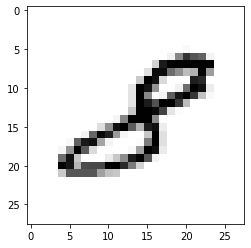

9920512it [08:47, 18802.28it/s]


In [11]:
# 테스트 데이터를 사용하여 모델을 테스트한다.
with torch.no_grad(): # torch.no_grad()를 하면 gradient 계산을 수행하지 않는다.
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측을 해본다
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()